Import

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/laylaalkhoury/Desktop/VE-IA/Engineering-Project/tweets_labelled.csv", delimiter=',')

df.head(5)

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False


Data Cleaning

In [24]:
print(df["Texte"].iloc[0])

le_Parisien :
"« Je me suis sentie humiliée » : basketteuse depuis 10 ans, Salimata a été exclue du terrain à cause de son voile
👉 https://t.co/oXa4A7igIO https://t.co/Lvv3HYDw51"


In [26]:

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))


def clean_and_remove_stopwords(tweet):

    if not isinstance(tweet, str):  # Check if the input is a string
        return ""
    
    # Step 1: Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    
    # Step 2: Remove emojis and special characters
    tweet = re.sub(r"[^\w\s]", " ", tweet)
    
    # Step 3: Remove mentions (tags)
    tweet = re.sub(r"@\w+", "", tweet)
    
    # Step 4: Remove extra whitespace
    tweet = re.sub(r"\s+", " ", tweet).strip()
    
    # Step 5: Remove French stopwords
    words = tweet.split()  # Split into words
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    return " ".join(filtered_words)  # Join filtered words into a single string

df['clean'] = df['Texte'].apply(clean_and_remove_stopwords)




[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


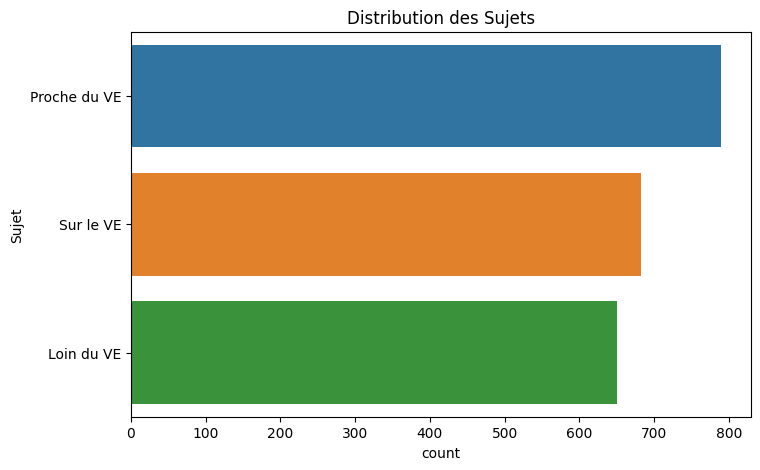

In [27]:
import seaborn as sns 

# Analyse des catégories (distribution des sujets)

plt.figure(figsize=(8, 5))
sns.countplot(y='Sujet', data=df, order=df['Sujet'].value_counts().index)
plt.title("Distribution des Sujets")
plt.show()

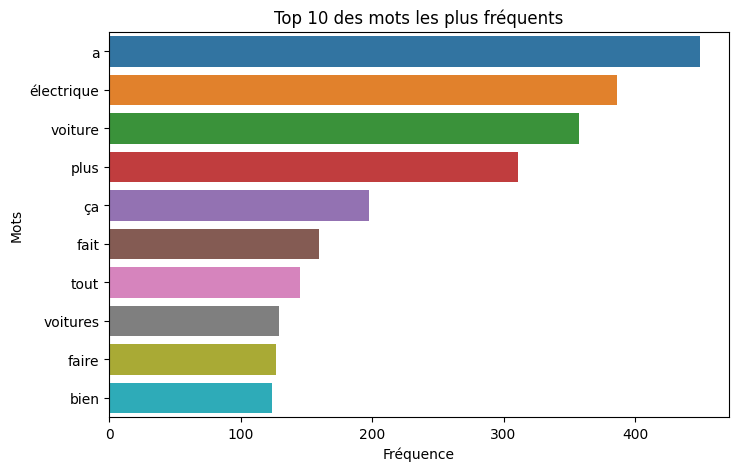

In [28]:
# Fréquences des mots
from collections import Counter

all_words = " ".join(df['clean']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Visualiser les mots les plus fréquents
words, counts = zip(*common_words)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 10 des mots les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.show()

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

TF-IDF BAYES

In [31]:
X = df['clean']
y = df['Sujet'] 

df = df.dropna(subset=['clean', 'Sujet'])  # Replace 'label' with your target column name


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF to transform the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7952941176470588

Classification Report:
               precision    recall  f1-score   support

  Loin du VE       0.92      0.67      0.77       129
Proche du VE       0.71      0.84      0.77       154
   Sur le VE       0.81      0.86      0.84       142

    accuracy                           0.80       425
   macro avg       0.82      0.79      0.79       425
weighted avg       0.81      0.80      0.79       425



TF-IDF + SVM 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'cleaned_text' is the feature and 'label' is the target column
X = df['clean']
y = df['Sujet']  # Change this to the actual column name for labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF to transform the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')  # Using linear kernel for text classification
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7952941176470588

Classification Report:
               precision    recall  f1-score   support

  Loin du VE       0.78      0.78      0.78       129
Proche du VE       0.72      0.80      0.75       154
   Sur le VE       0.93      0.80      0.86       142

    accuracy                           0.80       425
   macro avg       0.81      0.79      0.80       425
weighted avg       0.80      0.80      0.80       425



In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


svm = SVC()
grid_search = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)


Meilleurs paramètres : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [38]:
# Réentraînement du modèle avec les meilleurs paramètres
svm_optimized = SVC(C=1, kernel='linear', gamma='scale')  # Utilisez les paramètres trouvés
svm_optimized.fit(X_train_tfidf, y_train)

# Faire des prédictions sur les données de test
y_pred_optimized = svm_optimized.predict(X_test_tfidf)

# Évaluer le modèle optimisé
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy après optimisation :", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report après optimisation:\n", classification_report(y_test, y_pred_optimized))


Accuracy après optimisation : 0.7952941176470588

Classification Report après optimisation:
               precision    recall  f1-score   support

  Loin du VE       0.78      0.78      0.78       129
Proche du VE       0.72      0.80      0.75       154
   Sur le VE       0.93      0.80      0.86       142

    accuracy                           0.80       425
   macro avg       0.81      0.79      0.80       425
weighted avg       0.80      0.80      0.80       425



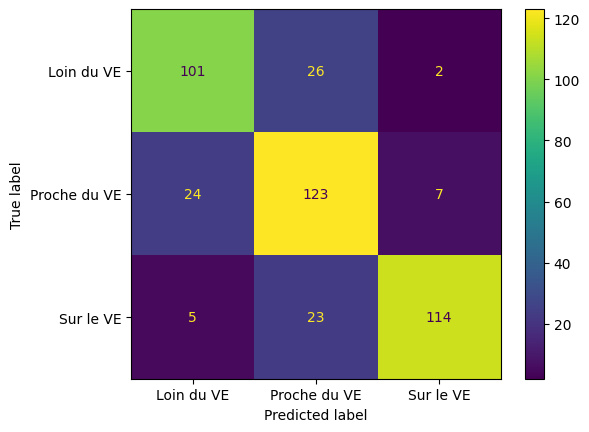

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred_optimized)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=svm_optimized.classes_)
disp.plot(cmap='viridis')
plt.show()


diagonale correcte,
hors diagonale ex: 26 loin du VE on etait classé proche di VE

In [44]:
!pip install transformers[torch]



zsh:1: no matches found: transformers[torch]


In [45]:
!pip install accelerate -U


In [47]:
from gensim.models import Word2Vec
import numpy as np

# Entraîner un modèle Word2Vec
sentences = [tweet.split() for tweet in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Représenter les tweets comme la moyenne des vecteurs de mots
def get_mean_vector(tweet):
    return np.mean([word2vec_model.wv[word] for word in tweet.split() if word in word2vec_model.wv], axis=0)

X_train_w2v = np.array([get_mean_vector(tweet) for tweet in X_train])
X_test_w2v = np.array([get_mean_vector(tweet) for tweet in X_test])

# Classifier avec SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_w2v, y_train)
y_pred_w2v = svm_classifier.predict(X_test_w2v)
print("Accuracy:", accuracy_score(y_test, y_pred_w2v))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w2v))



ModuleNotFoundError: No module named 'gensim'